# Demonstration of Integration with Statistical Clear Sky Fitting Package

8/25/20

### Notebook setup and library imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# PVInsight Code Imports
from solardatatools import DataHandler
from solardatatools.dataio import get_pvdaq_data

### Load data table from external source

For today's example, we're loading data from NREL's PVDAQ API, which is a publically available PV generatation data set. 

In [2]:
data_frame = get_pvdaq_data(sysid=34, year=range(2011, 2015), api_key='DEMO_KEY')

In [3]:
dh = DataHandler(data_frame)

In [4]:
dh.run_pipeline(power_col='ac_power')

total time: 2.53 seconds
form matrix: 0.05, fill matrix: 0.15, daily scores: 0.23, 
daily flags: 0.03, clear detect: 0.21, clipping check: 0.20, 
data scoring: 1.03, fix time shifts: 0.63,


SCSF is in a seperate package, but if the software is installed in your environment, you can fit a clear sky model to your data directly from the `DataHandler` class instance.

In [5]:
dh.fit_statistical_clear_sky_model()

obtaining weights
obtaining initial value of component r0
Starting at Objective: 9.694e+09, f1: 3.818e+07, f2: 4.359e+02, f3: 7.273e+09, f4: 2.383e+09
    Minimizing left matrix
    Minimizing right matrix
1 - Objective: 3.691e+07, f1: 3.476e+07, f2: 4.033e+02, f3: 2.157e+06, f4: 6.309e-05
    Minimizing left matrix
    Minimizing right matrix
2 - Objective: 3.238e+07, f1: 3.019e+07, f2: 1.650e+03, f3: 2.183e+06, f4: 7.002e-07
    Minimizing left matrix
    Minimizing right matrix
3 - Objective: 3.215e+07, f1: 2.997e+07, f2: 1.473e+03, f3: 2.177e+06, f4: 6.287e-06
    Minimizing left matrix
    Minimizing right matrix
4 - Objective: 3.212e+07, f1: 2.994e+07, f2: 1.493e+03, f3: 2.173e+06, f4: 2.030e-07
    Minimizing left matrix
    Minimizing right matrix
5 - Objective: 3.211e+07, f1: 2.993e+07, f2: 1.530e+03, f3: 2.171e+06, f4: 5.809e-08
Minimization complete in 0.69 minutes


The clear sky model is accessable as an attribute of the `DataHandler`

In [6]:
dh.scsf

The `SCSF` attribute is also a class, with its own plotting functions.

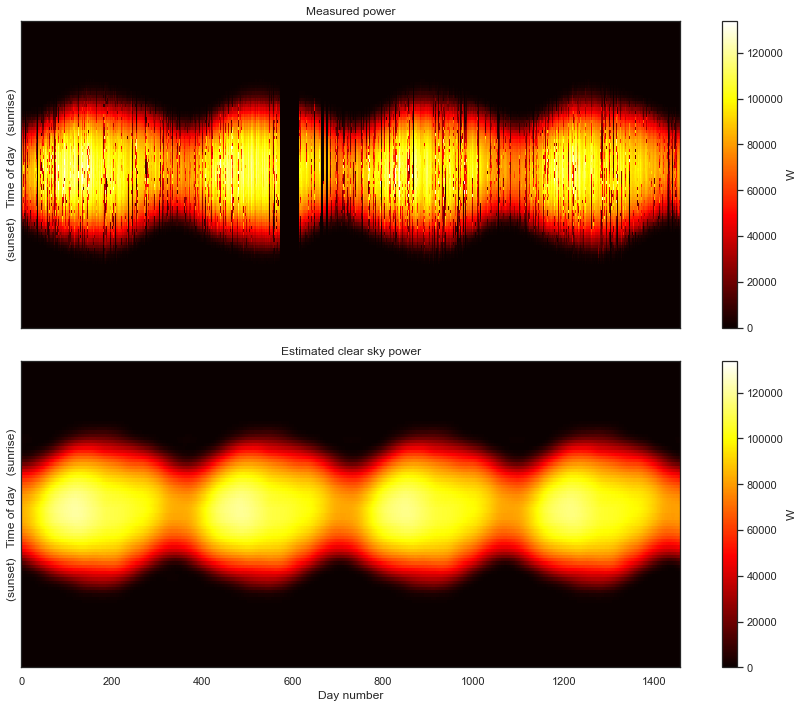

In [7]:
dh.scsf.plot_measured_clear_matrices(units='W');

The `DataHandler` instance can access the data in the `SCSF` instance as well, as shown below.

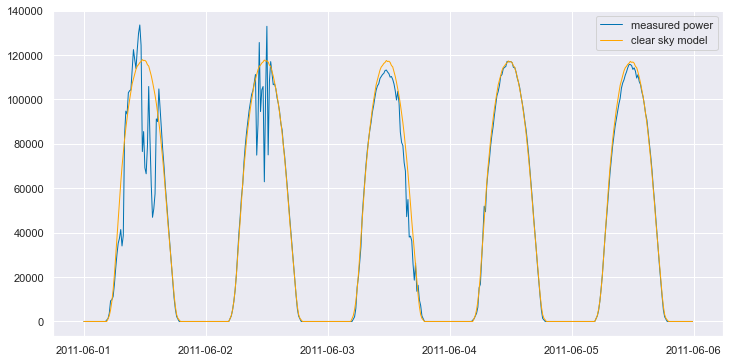

In [8]:
dh.plot_daily_signals(start_day=150, show_legend=True);

The fit model can be used for other tasks as well. Below, we use it to find clear *time periods* within the data set.

In [13]:
dh.find_clear_times()

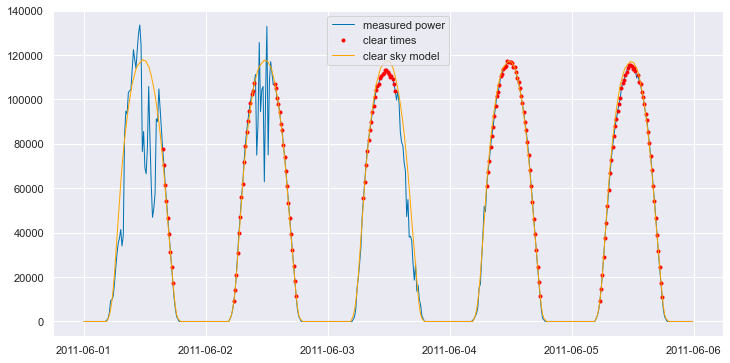

In [14]:
dh.plot_daily_signals(start_day=150, boolean_mask=dh.boolean_masks.clear_times, mask_label='clear times',
                      show_legend=True);